In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table, vstack
import hdbscan
from pathlib import Path
import seaborn as sns
import glob
import json
%matplotlib inline
sns.set_color_codes()

In [2]:
ROOT_PATH = Path("..") 

In [3]:
table = Table.read("Halpha-DR3_PStotal-STAR_total-clean-unique.ecsv", format="ascii.ecsv")

In [4]:
print("The number of emitters is:", len(table))
table.colnames

The number of emitters is: 2187


['Field',
 'ID',
 'RA',
 'DEC',
 'FWHM',
 'ISOarea',
 'KRON_RADIUS',
 'MU_MAX',
 'nDet_PStotal',
 'PhotoFlagDet',
 'CLASS_STAR',
 'u_PStotal',
 'J0378_PStotal',
 'J0395_PStotal',
 'J0410_PStotal',
 'J0430_PStotal',
 'g_PStotal',
 'J0515_PStotal',
 'r_PStotal',
 'J0660_PStotal',
 'i_PStotal',
 'J0861_PStotal',
 'z_PStotal',
 'e_u_PStotal',
 'e_J0378_PStotal',
 'e_J0395_PStotal',
 'e_J0410_PStotal',
 'e_J0430_PStotal',
 'e_g_PStotal',
 'e_J0515_PStotal',
 'e_r_PStotal',
 'e_J0660_PStotal',
 'e_i_PStotal',
 'e_J0861_PStotal',
 'e_z_PStotal']

In [5]:
# Colors
m = (table["e_g_PStotal"] <= 0.2) & (table["e_z_PStotal"] <= 0.2)
m1 =  (table["e_u_PStotal"] <= 0.2) &(table["e_g_PStotal"] <= 0.2) 
zg = table['z_PStotal'][m] - table['g_PStotal'][m]
gr = table['g_PStotal'][m] - table['r_PStotal'][m]
ri = table['r_PStotal'][m] - table['i_PStotal'][m]
iz = table['i_PStotal'][m] - table['z_PStotal'][m]
ug = table['u_PStotal'][m1] - table['g_PStotal'][m1]
gr_ = table['g_PStotal'][m1] - table['r_PStotal'][m1]
rz = table['r_PStotal'][m] - table['z_PStotal'][m]
print(len(ug))
print(len(gr))

1122
1892


/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


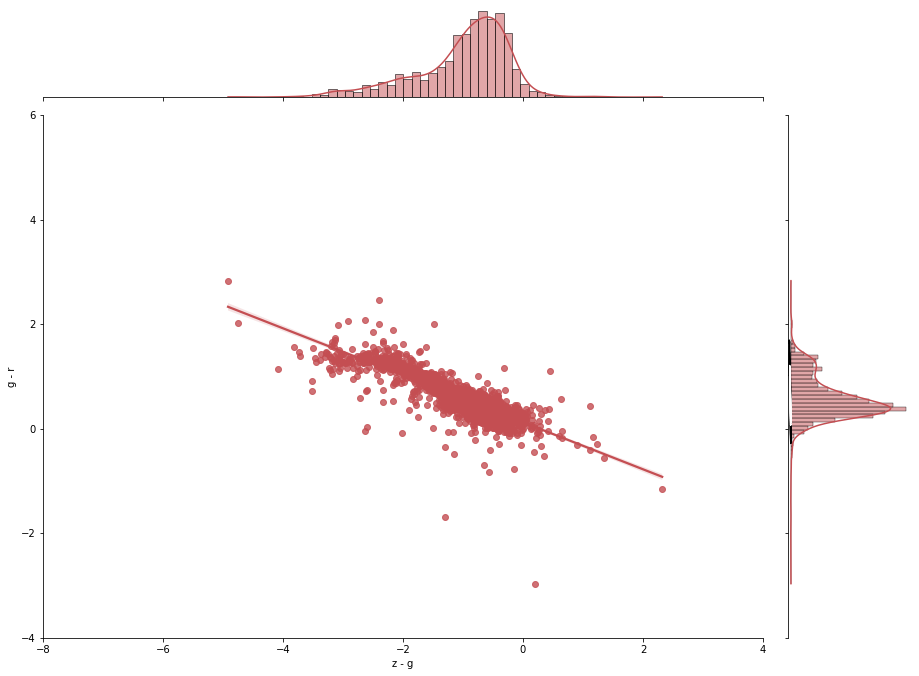

In [6]:
ax = sns.jointplot(zg, gr, kind="reg", color="r")
ax.ax_joint.set(xlim=[-8, 4], ylim=[-4, 6],
               xlabel=r"z - g",
    ylabel=r"g - r")
pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
sns.kdeplot(
    zg, gr,
    cmap=pal,
)
# Limiting the blue and red region
x_new = np.linspace(-15.0, 1000, 200)
y = 0.35*x_new + 1.5

#ax.ax_joint.set_aspect("equal")
ax.fig.set_size_inches(14, 10)

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


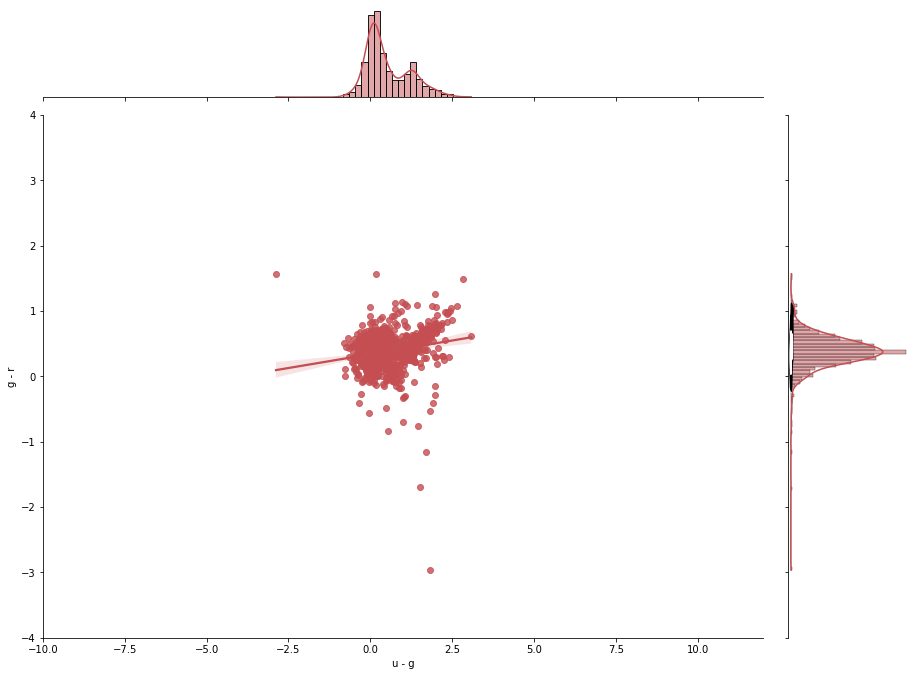

In [7]:
ax = sns.jointplot(ug, gr_, kind="reg", color="r")
ax.ax_joint.set(xlim=[-10, 12], ylim=[-4, 4],
               xlabel=r"u - g",
    ylabel=r"g - r")
pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
sns.kdeplot(
    ug, gr_,
    cmap=pal,
)
#ax.ax_joint.set_aspect("equal")
ax.fig.set_size_inches(14, 10)

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


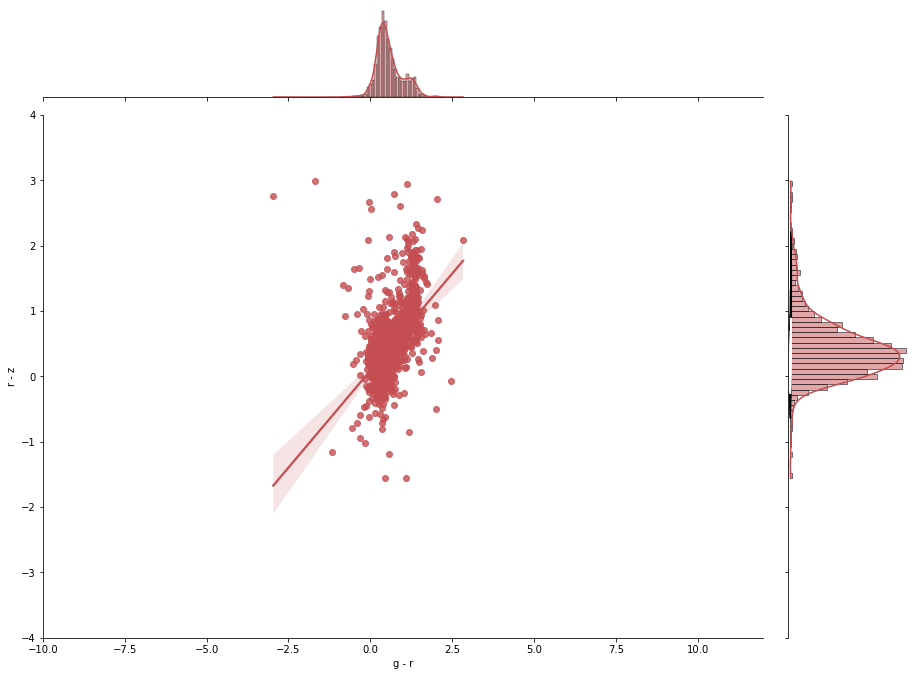

In [8]:
ax = sns.jointplot(gr, rz, kind="reg", color="r")
ax.ax_joint.set(xlim=[-10, 12], ylim=[-4, 4],
               xlabel=r"g - r",
    ylabel=r"r - z")
pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
sns.kdeplot(
    gr, rz,
    cmap=pal,
)
#ax.ax_joint.set_aspect("equal")
ax.fig.set_size_inches(14, 10)

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


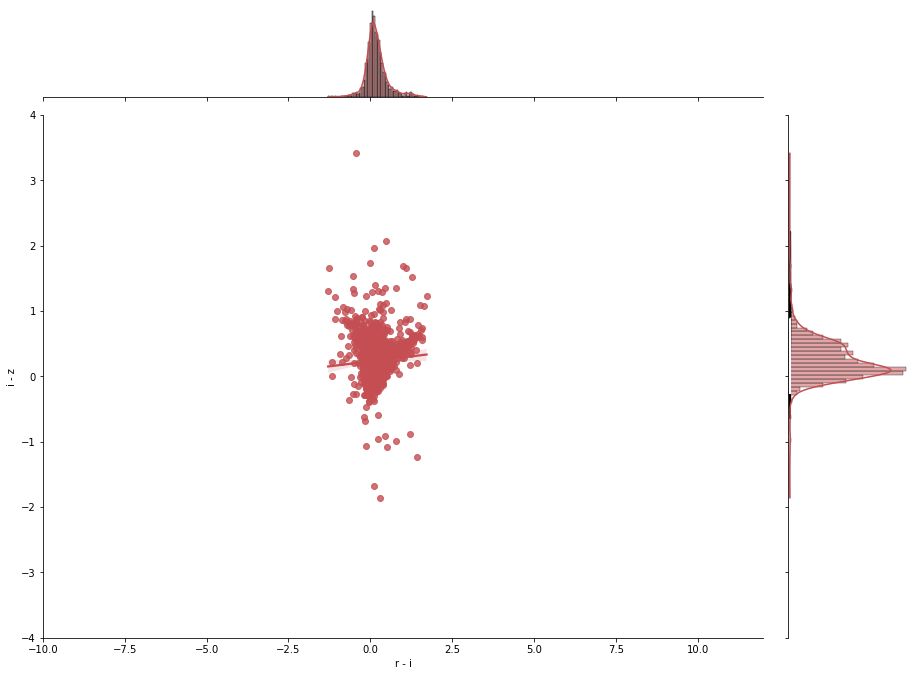

In [9]:
ax = sns.jointplot(ri, iz, kind="reg", color="r")
ax.ax_joint.set(xlim=[-10, 12], ylim=[-4, 4],
               xlabel=r"r - i",
    ylabel=r"i - z")
pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
sns.kdeplot(
    gr, rz,
    cmap=pal,
)
#ax.ax_joint.set_aspect("equal")
ax.fig.set_size_inches(14, 10)

# Fitting a Gaussian Mixture Model with Scikit-learn’s GaussianMixture() function

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [11]:
X = np.array(list(zip(gr, rz)))
print(X.shape)
# Standarized the data
X = StandardScaler().fit_transform(X)

(1892, 2)


In [12]:
gmm = GaussianMixture(2, 
                     covariance_type='full', 
                     random_state=0).fit(X)

In [13]:
gmm.means_

array([[-0.30829057, -0.35246761],
       [ 0.78162949,  0.89363442]])

In [14]:
labels = gmm.predict(X)

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r_PStotal', ylabel='g_PStotal'>

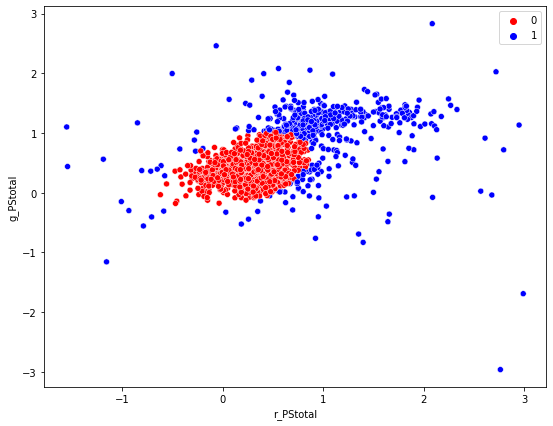

In [15]:
plt.figure(figsize=(9,7))
sns.scatterplot(rz, gr, 
                hue=labels,
                palette=["red","blue"])
#plt.savefig("fitting_Gaussian_Mixture_Models_with_3_components_scikit_learn_Python.png",
                    #format='png',dpi=150)

# Using k-nearst

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [18]:
#predictions from kmeans
label = kmeans.labels_
pred = kmeans.predict(X)
print(label, pred)

[1 0 0 ... 0 0 0] [1 0 0 ... 0 0 0]


No handles with labels found to put in legend.


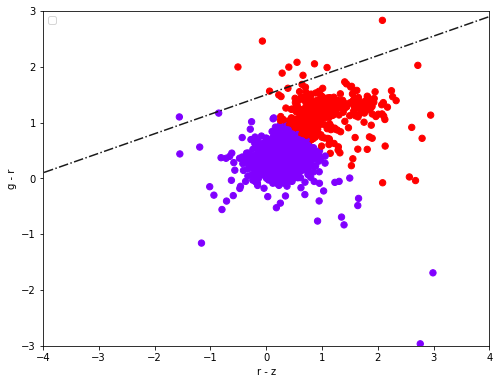

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set(
        xlim=[-4, 4], ylim=[-3., 3.]
      )
ax.scatter(rz, gr, c=label, s=40, cmap="rainbow")
ax.set(
    #xscale="log",
    #yscale="log",
    #xlim=[0.75, 15],
    #ylim=[0.75, 15],
    xlabel=r"r - z",
    ylabel=r"g - r",
)
# Limiting the blue and red region
x_new = np.linspace(-15.0, 1000, 200)
y = 0.35*x_new + 1.5
ax.plot(x_new, y, color='k', zorder=100, linestyle='-.')
ax.legend()
ax.set_aspect("equal")

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r_PStotal', ylabel='g_PStotal'>

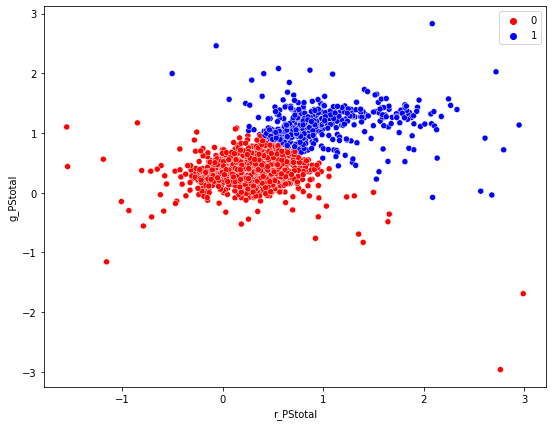

In [20]:
plt.figure(figsize=(9,7))
sns.scatterplot(rz, gr, 
                hue=label,
                palette=["red","blue"])

In [21]:
table_= table[m]
table_["Label_k"] = label
mask0 = table_["Label_k"] == 0
mask1 = table_["Label_k"] == 1

In [22]:
# Iphaas colors
ri_0 = table_['r_PStotal'][mask0] - table_['i_PStotal'][mask0]
rj660_0 = table_['r_PStotal'][mask0] - table_['J0660_PStotal'][mask0]
ri_1 = table_['r_PStotal'][mask1] - table_['i_PStotal'][mask1]
rj660_1 = table_['r_PStotal'][mask1] - table_['J0660_PStotal'][mask1]
print("Number of objects classified as blue",len(ri_1))
print("Number of objects classified as red",len(ri_0))

Number of objects classified as blue 456
Number of objects classified as red 1436


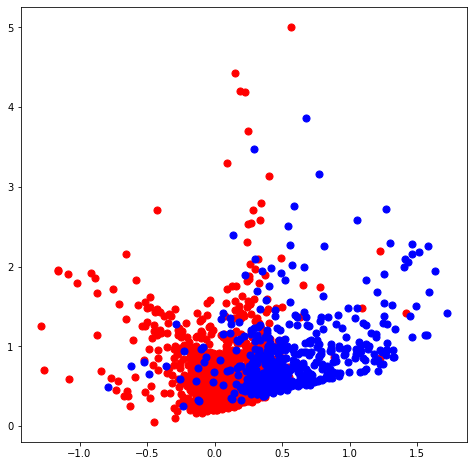

In [23]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.scatter(ri_0, rj660_0, c="red",
            s=50, cmap='viridis');
ax1.scatter(ri_1, rj660_1, c="blue",
            s=50, cmap='viridis');

In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(label)) - (1 if -1 in label else 0)
n_cluster0 = list(label).count(0)
n_cluster1 = list(label).count(1)
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)


Estimated number of clusters: 2
Estimated number of cluster points 0: 1436
Estimated number of cluster points 1: 456


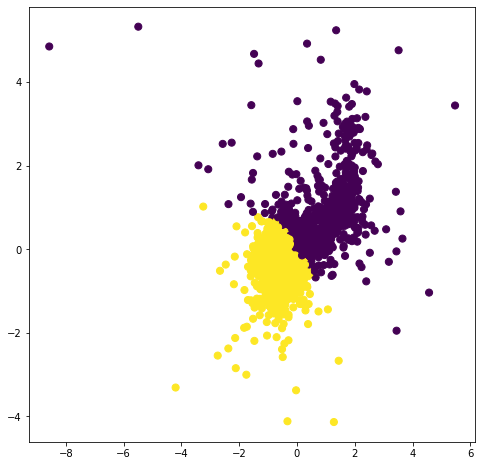

In [25]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r_PStotal', ylabel='g_PStotal'>

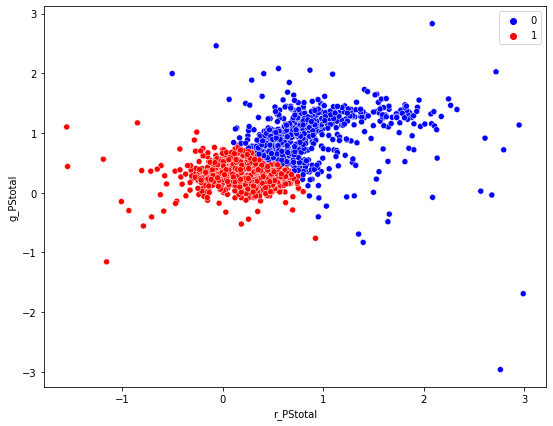

In [26]:
plt.figure(figsize=(9,7))
sns.scatterplot(rz, gr, 
                hue=labels,
                palette=["blue","red"])

In [27]:
table_["Label_sp"] = labels
masks0 = table_["Label_sp"] == 0
masks1 = table_["Label_sp"] == 1
# Iphaas colors
ris_0 = table_['r_PStotal'][masks0] - table_['i_PStotal'][masks0]
rj660s_0 = table_['r_PStotal'][masks0] - table_['J0660_PStotal'][masks0]
ris_1 = table_['r_PStotal'][masks1] - table_['i_PStotal'][masks1]
rj660s_1 = table_['r_PStotal'][masks1] - table_['J0660_PStotal'][masks1]
len(ris_0)

749

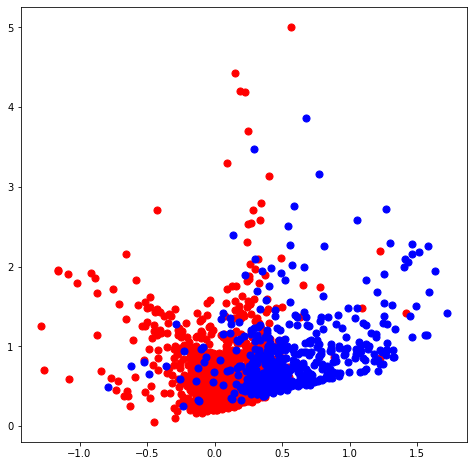

In [28]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.scatter(ri_0, rj660_0, c="red",
            s=50, cmap='viridis');
ax1.scatter(ri_1, rj660_1, c="blue",
            s=50, cmap='viridis');

In [29]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(label)) - (1 if -1 in label else 0)
n_cluster0 = list(label).count(0)
n_cluster1 = list(label).count(1)
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)

Estimated number of clusters: 2
Estimated number of cluster points 0: 1436
Estimated number of cluster points 1: 456


# Using HDBSCAN

In [30]:
import hdbscan

In [519]:
# Applying HDBSCAN
clusterer = hdbscan.HDBSCAN(min_samples=15, min_cluster_size=60, prediction_data=True).fit(X)
labels_h = clusterer.labels_

In [520]:
clusterer.metric

'euclidean'

In [521]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_h)) - (1 if -1 in labels_h else 0)
n_cluster0 = list(labels_h).count(0)
n_cluster1 = list(labels_h).count(1)
n_cluster2 = list(labels_h).count(2)
n_noise_ = list(labels_h).count(-1)

In [522]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of cluster points 0: 131
Estimated number of cluster points 1: 1413
Estimated number of cluster points 2: 0
Estimated number of noise points: 348


/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='g_PStotal', ylabel='r_PStotal'>

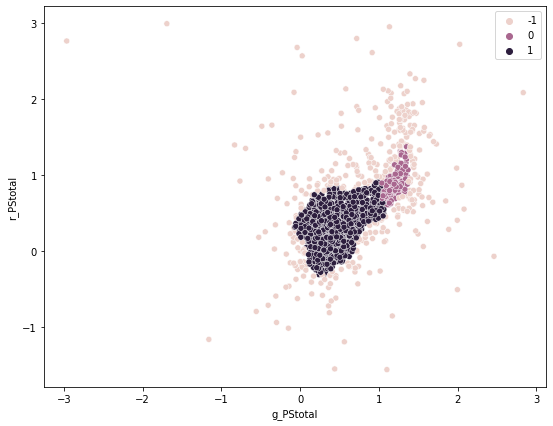

In [523]:
plt.figure(figsize=(9,7))
sns.scatterplot(gr, rz, 
                hue=labels_h,
                )

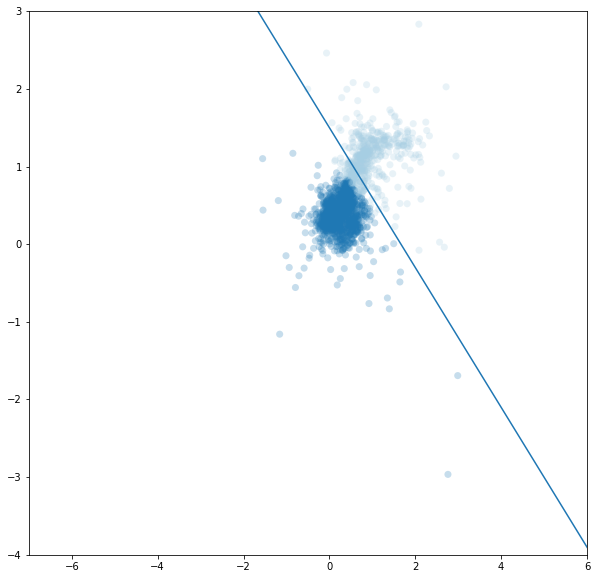

In [524]:
soft_clusters0 = hdbscan.all_points_membership_vectors(clusterer)
color_palette0 = sns.color_palette('Paired', 12)
cluster_colors0 = [color_palette0[np.argmax(x)]
                  for x in soft_clusters0]
y = -0.9*x_new + 1.5
plt.figure(figsize=(10,10))
plt.scatter(rz, gr, s=50, linewidth=0, c=cluster_colors0, alpha=0.25)
plt.xlim([-7, 6])
plt.ylim([-4, 3])
plt.plot(x_new, y)

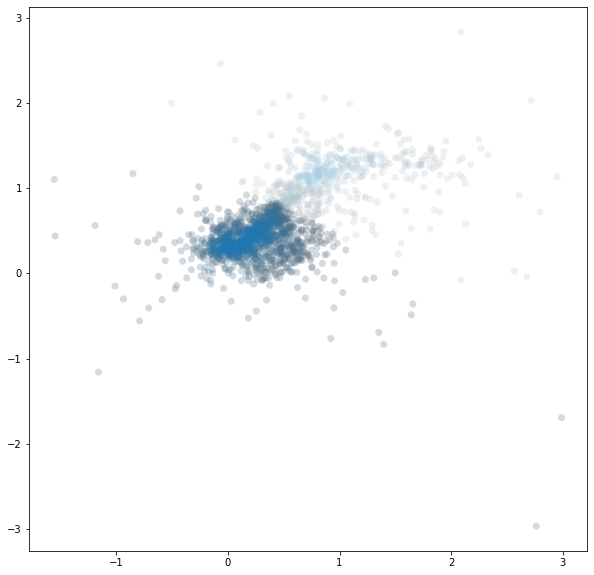

In [525]:
color_palette1 = sns.color_palette('Paired', 12)
cluster_colors1 = [sns.desaturate(color_palette1[np.argmax(x)], np.max(x))
                  for x in soft_clusters0]
plt.figure(figsize=(10,10))
plt.scatter(rz, gr, s=50, linewidth=0, c=cluster_colors1, alpha=0.25)

# Hierarchical Clustering

In [526]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

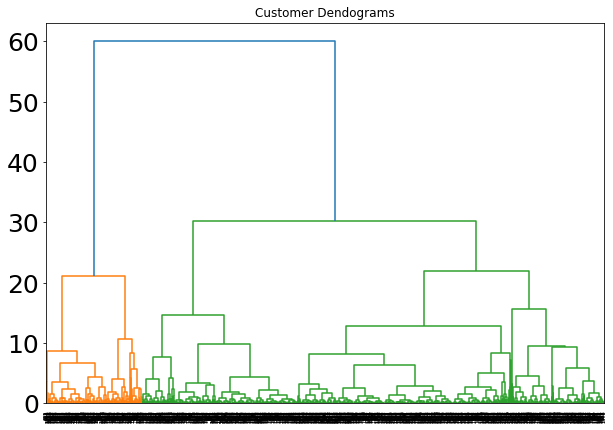

In [138]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
plt.tick_params(axis='y', labelsize=25)
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [108]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit_predict(X)

array([1, 0, 0, ..., 0, 0, 0])

In [109]:
label_hi=model.labels_

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


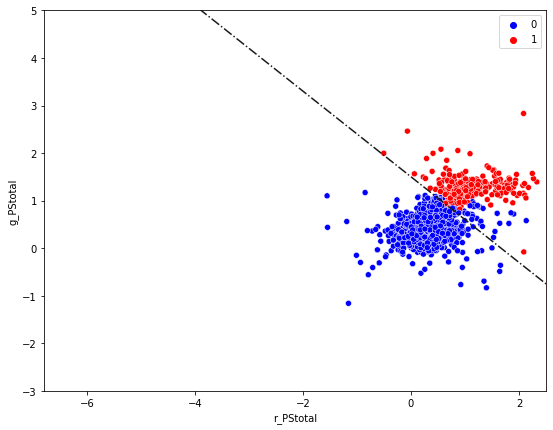

In [110]:
plt.figure(figsize=(9,7))
plt.axis([-6.8, 2.5, -3., 5.])
sns.scatterplot(rz, gr, 
                hue=label_hi,
                palette=["blue","red"])

# Limiting the blue and red region
x_new = np.linspace(-15.0, 1000, 200)
y = -0.9*x_new + 1.5

plt.plot(x_new, y, color='k', zorder=100, linestyle='-.')

In [111]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(label_hi)) - (1 if -1 in label_hi else 0)
n_cluster0 = list(label_hi).count(0)
n_cluster1 = list(label_hi).count(1)
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)

Estimated number of clusters: 2
Estimated number of cluster points 0: 1564
Estimated number of cluster points 1: 328


In [112]:
table_["Label_hier"] = label_hi
mask_h0 = table_["Label_hier"] == 0
mask_h1 = table_["Label_hier"] == 1
# Iphaas colors
ri_h0 = table_['r_PStotal'][mask_h0] - table_['i_PStotal'][mask_h0]
rj660_h0 = table_['r_PStotal'][mask_h0] - table_['J0660_PStotal'][mask_h0]
ri_h1 = table_['r_PStotal'][mask_h1] - table_['i_PStotal'][mask_h1]
rj660_h1 = table_['r_PStotal'][mask_h1] - table_['J0660_PStotal'][mask_h1]

In [113]:
# save the files blue and red ones
asciifile0 = "Blue0-Halpha-DR3_PStotal-STAR_total-clean-unique.ecsv" 
asciifile1 = "Red1-Halpha-DR3_PStotal-STAR_total-clean-unique.ecsv" 
table_[mask_h0].write(asciifile0, format="ascii.ecsv")
table_[mask_h1].write(asciifile1, format="ascii.ecsv")

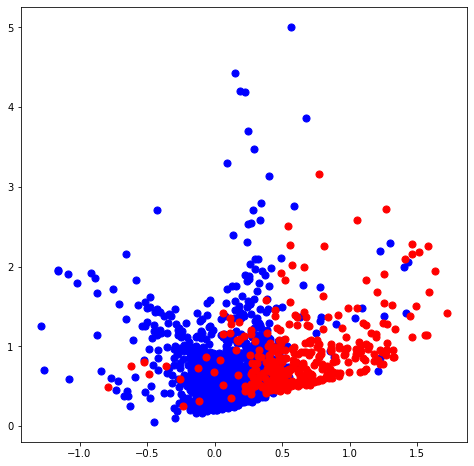

In [114]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.scatter(ri_h0, rj660_h0, c="blue",
            s=50, cmap='viridis');
ax1.scatter(ri_h1, rj660_h1, c="red",
            s=50, cmap='viridis');